In [30]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

In [31]:
import micronn as mn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.rcParams['image.cmap'] = plt.cm.Spectral

In [32]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X, y = X.T, y.reshape((1, -1))
x_train, y_train = x_train.T, y_train.reshape((1, -1))
x_test, y_test = x_test.T, y_test.reshape((1, -1))

In [33]:
net = [
    mn.Dense(10), 
    mn.Dense(5), 
    mn.Dense(1, mn.Sigmoid())
]

model = mn.Model(net, mn.BinaryCrossentropy(), mn.RMSprop())
model.fit(x_train, y_train, epochs=300)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test.T.ravel(), y_pred.T.ravel())

100%|██████████| 300/300 [00:03<00:00, 95.97it/s] 


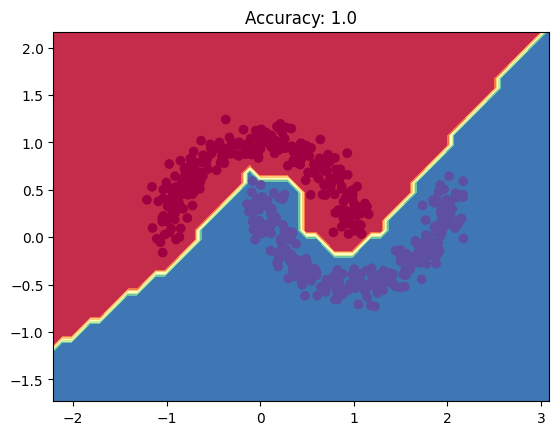

In [34]:
mn.plot_decision_boundary(lambda x: model.predict(x), X, y, plt, algorithms='nn')
plt.title(f'Accuracy: {str(accuracy)}')
plt.show()

Text(0, 0.5, 'Loss')

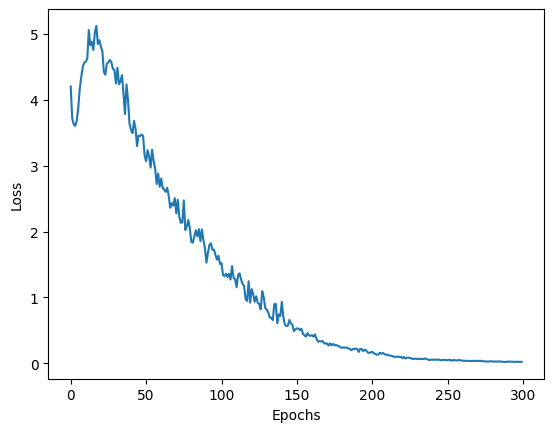

In [35]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')